In [2]:
#library importation
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab.patches import cv2_imshow
from numpy.fft import fft, ifft
import skimage
from skimage import restoration
import scipy
from scipy.fftpack import fftn, ifftn
from astropy.io import fits
from scipy.ndimage import gaussian_filter as gf

In [3]:
news = cv2.imread("/content/drive/MyDrive/EE610-Assignments/newspaper-dots.jpg",0)  #reading image

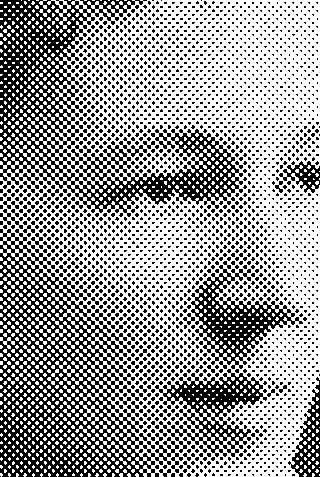

(477, 320)


In [4]:
cv2_imshow(news)
print(news.shape)   #showing image and shape

In [5]:
fil = np.ones((15,15))/225
#creating a smoothing filter named fil 

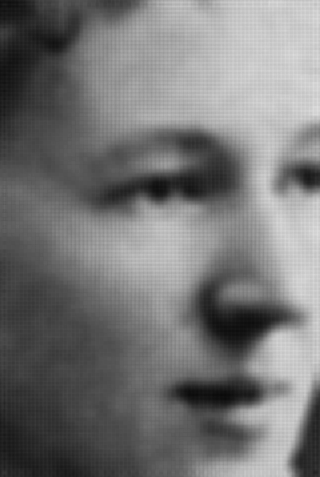

(477, 320)


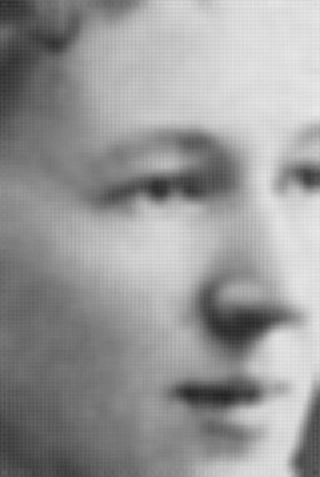

In [6]:
smnews = cv2.filter2D(news,-1,fil)   #applying fil filter to image 
#after that applying gamma transform to the resulting image smnews 
gamma = 1.6    #randomly choosen value by trail and error
smnews1 = ((smnews/255)**gamma)*255
cv2_imshow(((smnews/255)**gamma)*255)   #gamma transformed image 
print(smnews.shape)
cv2_imshow(smnews)  #filtered image with "fil" filter

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


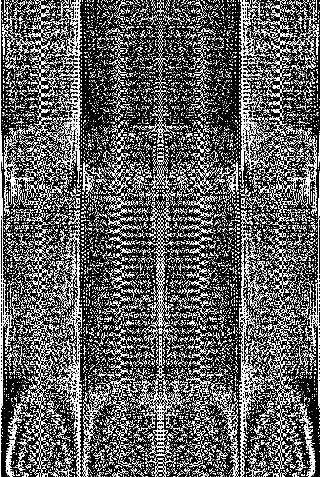

In [8]:
fft1 = fft(news)
cv2_imshow(fft1)
#applying fft from numpy.fft to the image       

[[1.59998828 1.59998559 1.60002297 1.59998559 1.59998828]
 [1.59998559 1.59998289 1.60002028 1.59998289 1.59998559]
 [1.60002297 1.60002028 1.60005766 1.60002028 1.60002297]
 [1.59998559 1.59998289 1.60002028 1.59998289 1.59998559]
 [1.59998828 1.59998559 1.60002297 1.59998559 1.59998828]]


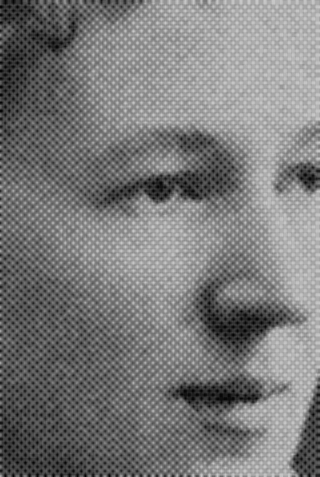

In [12]:
 # creating gaussain filter of size 5*5 
a = np.zeros((5,5)) # initiated an array of size 5*5
a[2,2] = 40     #set the centre value of the array 40 to just try the method 
gf1 = gf(a,25)    #created gaussian filter gf1 using '''from scipy.ndimage import gaussian_filter as gf''' this library
print(gf1)

smnews2 = cv2.filter2D(news/50,-1,gf1)   #applying to the original image news by dividing it with 50 , because without it the image was full while 
cv2_imshow(smnews2)

As we saw that that normal blur image - smnews is quite blur, to know what happen if we apply unsharp masking to it i am doing the next step 

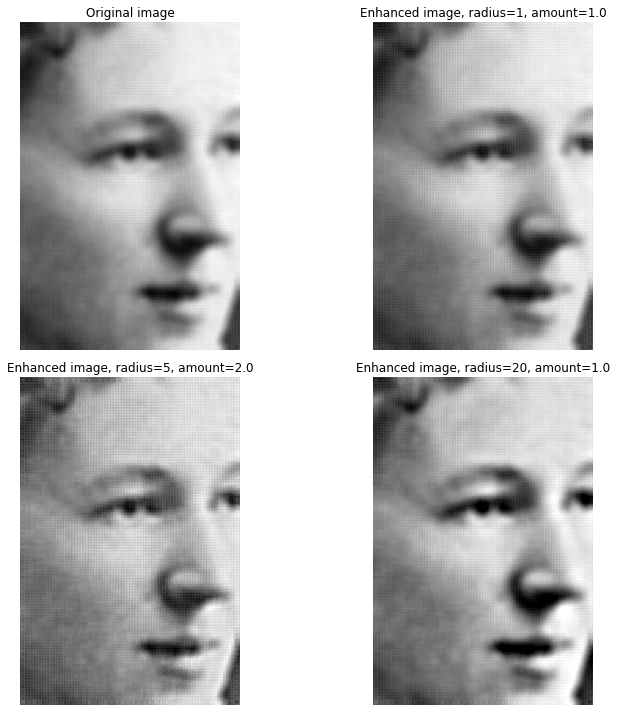

In [13]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = smnews.copy()  #taking smnews as image

#trying unsharp masking with different radius and amount 
result_1 = unsharp_mask(image, radius=1, amount=1)  
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)


#plotting all the result images with original image (here image)
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

The next step is to show effect of unsharp masking on the original dotted image (news)

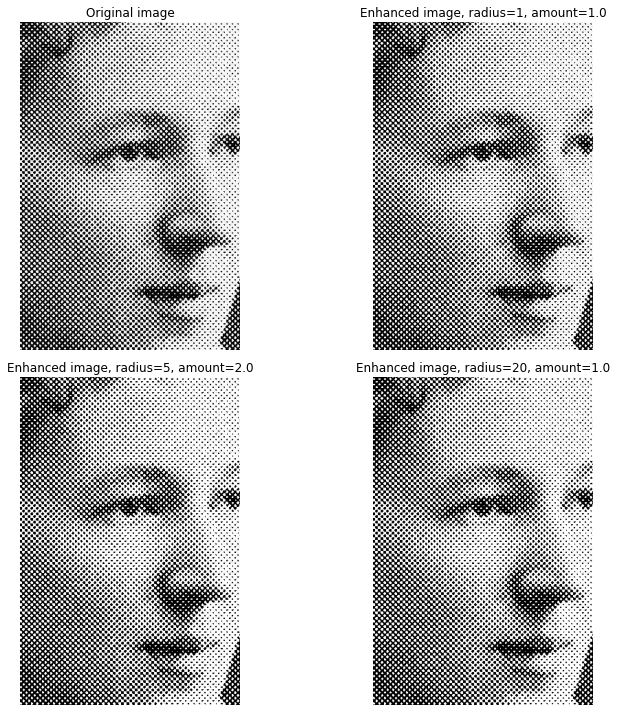

In [14]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = news.copy()  #taken "news" as input image 

#trying unsharp masking with different radius and amount
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

#plotting all the result images with original image (here image)
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

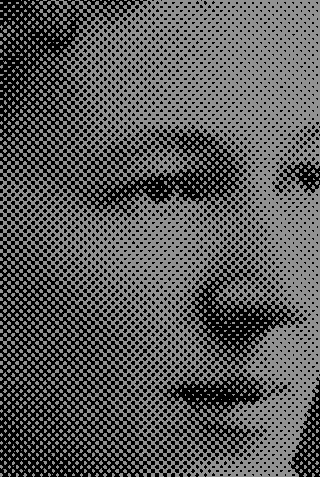

In [20]:
gamma = 0.1
smnews1 = ((result_3/255)**gamma)*255
cv2_imshow(((result_3/255)**gamma)*255)

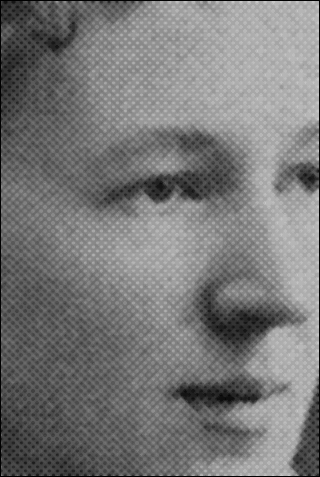

In [31]:
#Applying mediab filter to remove noise and edeg preservation 

# Median Spatial Domain Filtering


import cv2
import numpy as np


# Read the image
img_noisy1 = smnews2.copy()   #taken smnews2 as input image

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2_imshow(img_new1)
# cv2.imwrite('new_median_filtered.png', img_new1)


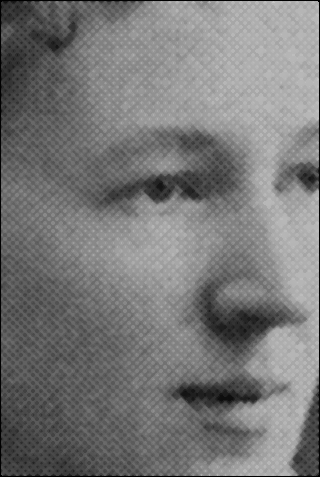

In [32]:
#Reapeating same to the output image of the previous cell
# Median Spatial Domain Filtering


import cv2
import numpy as np


# Read the image
img_noisy1 = img_new1.copy()

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2_imshow(img_new1)
# cv2.imwrite('new_median_filtered.png', img_new1)


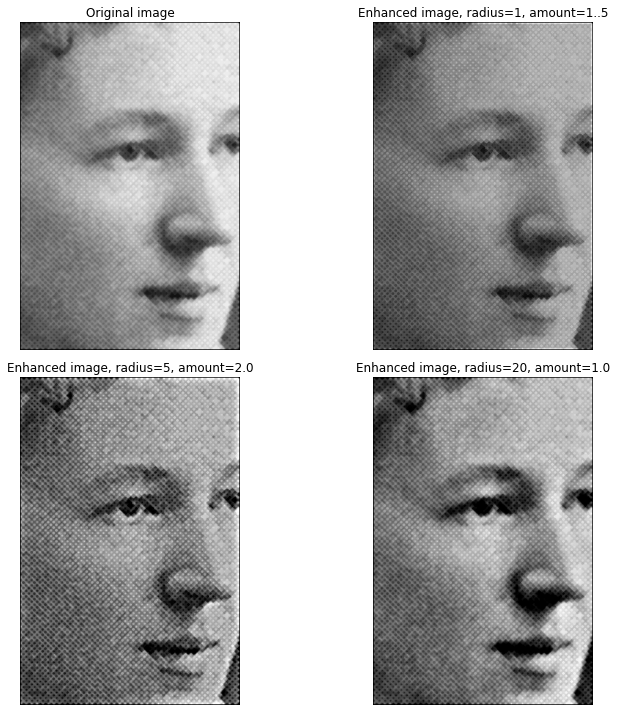

In [33]:
#Applying unsharp mask to sharpen the image 
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = img_new1.copy() #taken last cell output as input 
#different unsharp_mask with radius and amount 
result_1 = unsharp_mask(image, radius=1, amount=1.5)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=25, amount=1)

#plotting all the result along with original image
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1..5')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

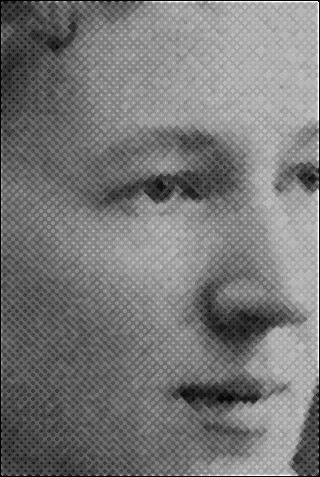

(477, 320)


In [44]:

final1 = result_1.copy()*255
cv2_imshow(final1)
print(final1.shape)

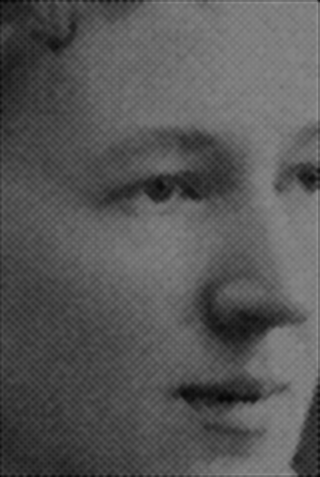

In [46]:
gs = np.array([[1,4,6,4,1],[4,16,24,26,4],[6,24,36,24,6],[4,16,24,26,4],[1,4,6,4,1]])/256   #creating a 5*5 gaussian filter 


temp = cv2.filter2D(final1/1.5,-1,gs)  #applying to final1 image(output last cell), devided with 1.5 to get a littel dark image


cv2_imshow(temp)



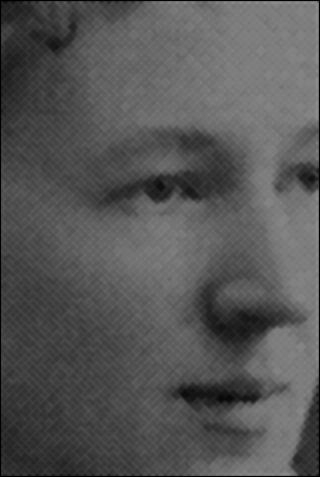

In [39]:
#Noice removal with edge preservation 
# Median Spatial Domain Filtering


import cv2
import numpy as np


# Read the image
img_noisy1 = temp.copy()

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2_imshow(img_new1)
# cv2.imwrite('new_median_filtered.png', img_new1)


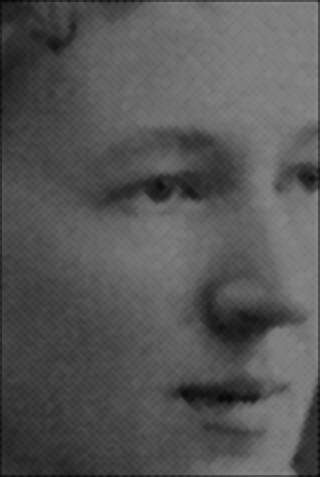

In [40]:
kernel2 = np.ones((3, 3), np.float32)/9   #smoothening filter creation of size 3*3

imgk2 = cv2.filter2D(img_new1,-1,kernel2)   #applying to the output of last cell 
cv2_imshow(cv2.filter2D(img_new1,-1,kernel2))

The Cell above is looking pretty nice to me, it has enough details and almost no grainy sence in image

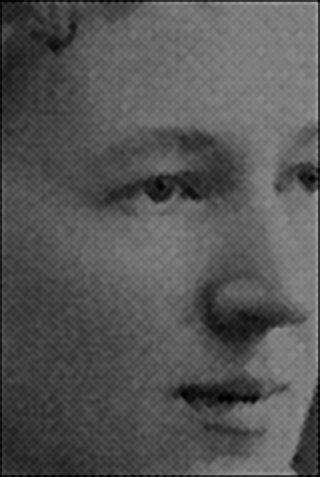

In [49]:
#applying unsharp maskinng to output of last cell
imgk2r = unsharp_mask(imgk2, radius=3, amount=1)
cv2_imshow(imgk2r*255)


Source: 
*   https://scikit-image.org/
*   https://www.geeksforgeeks.org/
*   https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
*   https://scikit-learn.org/